In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\BS . AMIRTHA\Downloads\customer_acquisition_data.csv")
df.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


Therefore there are no null values 

In [4]:
unique_channels = df['channel'].unique()
print("Unique Channels:", unique_channels)

Unique Channels: ['referral' 'paid advertising' 'email marketing' 'social media']


We can note here that there are four different unique channels which includes referral, paid advertising, email marketing and social media

C:\Users\BS . AMIRTHA\AppData\Local\Temp\ipykernel_17360\2092388675.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_revenue, x='channel', y='revenue', palette='viridis')


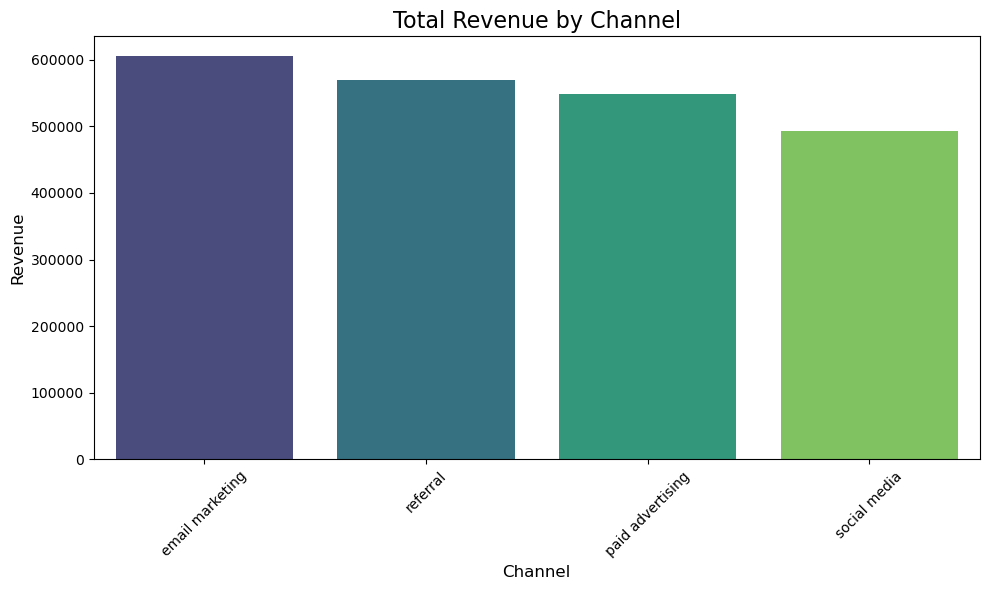

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


# Group by Channel and sum the Revenue
channel_revenue = df.groupby('channel')['revenue'].sum().reset_index()

# Sort (optional)
channel_revenue = channel_revenue.sort_values(by='revenue', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_revenue, x='channel', y='revenue', palette='viridis')

# Add labels and title
plt.title('Total Revenue by Channel', fontsize=16)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

It can be observed that Email Marketing generates the highest revenue, followed by Referral and Paid Advertising. Social Media, on the other hand, contributes the least to overall revenue

C:\Users\BS . AMIRTHA\AppData\Local\Temp\ipykernel_17360\3776587948.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_cost, x='channel', y='cost', palette='magma')


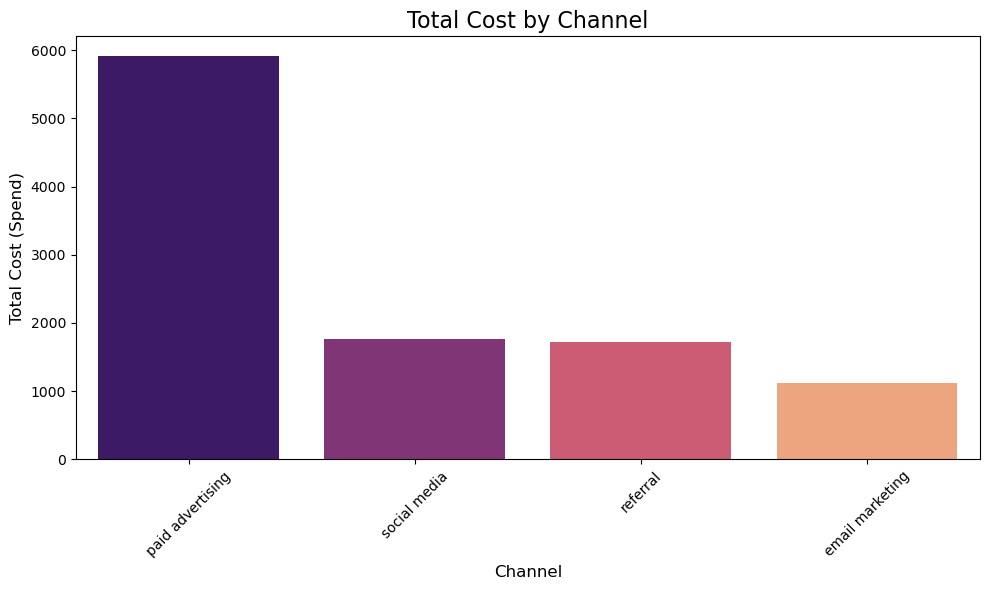

In [6]:
# Group by Channel and sum the Spend (Cost)
channel_cost = df.groupby('channel')['cost'].sum().reset_index()

# Sort (optional)
channel_cost = channel_cost.sort_values(by='cost', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_cost, x='channel', y='cost', palette='magma')

# Add labels and title
plt.title('Total Cost by Channel', fontsize=16)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Total Cost (Spend)', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

We observe that the highest spending is directed toward paid advertising, followed by social media and referral channels. Email marketing, on the other hand, incurs the least cost.

However, when we compare this spending with the revenue generated, we notice that platforms with lower costs are actually bringing in higher revenue. This suggests a potential opportunity to optimize marketing spend by reducing investment in high-cost channels like paid advertising and focusing more on cost-effective platforms that yield better returns.

That said, it is also possible that the marketing team is intentionally investing more in paid advertising and social media with the expectation of increasing conversion rates in the future.

To validate this hypothesis, we should cross-analyze the data with conversion rates to understand whether these high-spend channels are indeed leading to improved conversion outcomes.

C:\Users\BS . AMIRTHA\AppData\Local\Temp\ipykernel_17360\3479338771.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conversion_by_channel, x='channel', y='conversion_rate', palette='coolwarm')


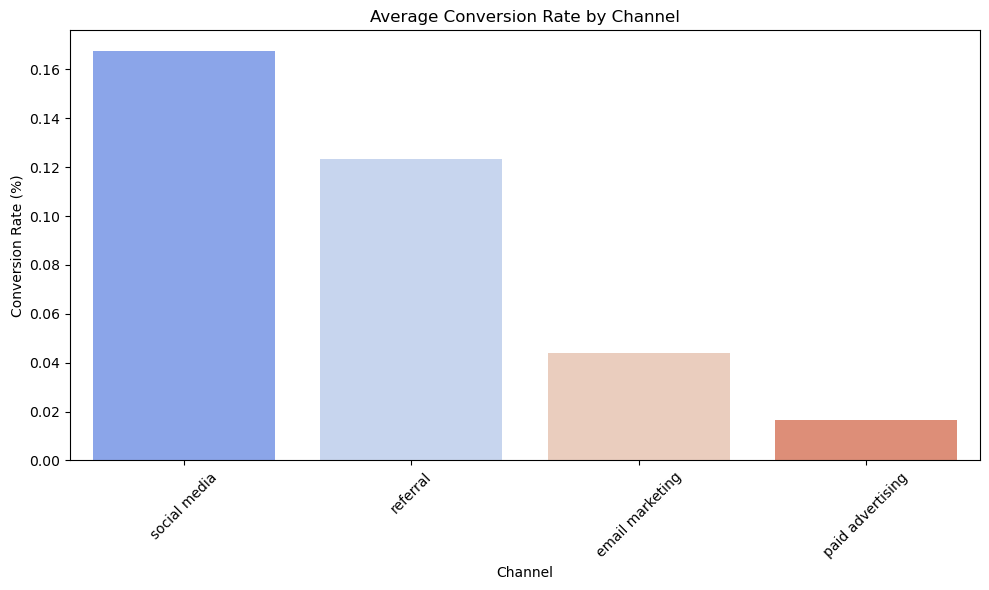

In [7]:
# Group by channel and calculate average conversion rate
conversion_by_channel = df.groupby('channel')['conversion_rate'].mean().reset_index()
conversion_by_channel = conversion_by_channel.sort_values(by='conversion_rate', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=conversion_by_channel, x='channel', y='conversion_rate', palette='coolwarm')
plt.title('Average Conversion Rate by Channel')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:


summary = df.groupby('channel').agg(
    total_revenue=('revenue', 'sum'),
    total_cost=('cost', 'sum'),
    avg_conversion_rate=('conversion_rate', 'mean')
).reset_index()


summary['avg_conversion_rate (%)'] = summary['avg_conversion_rate'] * 100


summary.drop(columns='avg_conversion_rate', inplace=True)

print("Summary Table (Numerical):")
print(summary)


Summary Table (Numerical):
            channel  total_revenue   total_cost  avg_conversion_rate (%)
0   email marketing         604706  1122.700340                 4.382223
1  paid advertising         548396  5907.363479                 1.634149
2          referral         569552  1722.307634                12.314498
3      social media         492667  1766.070249                16.759225


Social media has the highest conversion rate,

Followed by referral and email marketing,

While paid advertising shows the lowest conversion rate among all channels.

This indicates that paid advertising may not be a wise investment from a cost-efficiency perspective, especially when other channels are performing better at lower acquisition costs.

In [9]:
# Keep only relevant numeric columns
numeric_df = df[['cost', 'revenue', 'conversion_rate']]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                     cost   revenue  conversion_rate
cost             1.000000  0.018642        -0.537430
revenue          0.018642  1.000000        -0.050456
conversion_rate -0.537430 -0.050456         1.000000


Cost vs Revenue (0.0186): Almost no correlation – increasing spend isn’t leading to more revenue.

Cost vs Conversion Rate (-0.5374): Moderate negative correlation – higher spending is linked to lower conversion efficiency.

Revenue vs Conversion Rate (-0.0504): No meaningful link – high conversion rates don't guarantee higher revenue.

In [23]:
correlation = df['revenue'].corr(df['conversion_rate'])

print(f"Correlation between Revenue and Conversion Rate: {correlation:.4f}")

Correlation between Revenue and Conversion Rate: -0.0505


C:\Users\BS . AMIRTHA\AppData\Local\Temp\ipykernel_17360\3224056995.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel', y='Break_Even_Customers', data=df, palette='viridis')


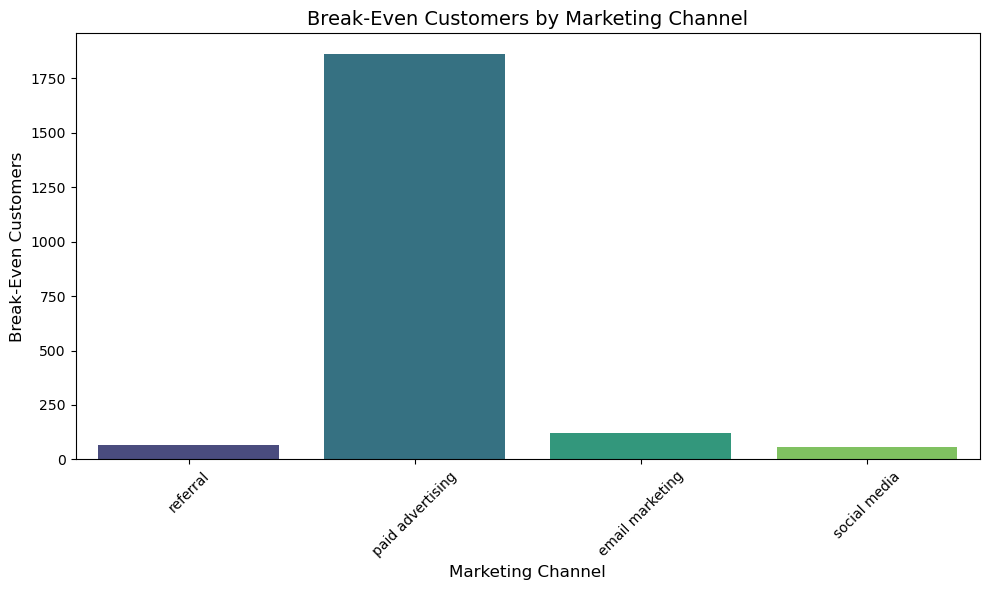

In [10]:
# Calculate Break-Even Customers
df['Break_Even_Customers'] = df['cost'] / df['conversion_rate']

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='channel', y='Break_Even_Customers', data=df, palette='viridis')

# Add labels and title
plt.title('Break-Even Customers by Marketing Channel', fontsize=14)
plt.xlabel('Marketing Channel', fontsize=12)
plt.ylabel('Break-Even Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

Paid Advertising has an extremely high break-even customer count compared to all other channels.
👉 This implies a very high cost or very low conversion rate, making it inefficient in its current form.

Referral, Email Marketing, and Social Media all show significantly lower break-even thresholds,
indicating these are much more cost-effective acquisition channels.

In [11]:
# Group by channel and calculate total cost and number of customers
cac_df = df.groupby('channel').agg({
    'cost': 'sum',
    'customer_id': 'count'
}).reset_index()

# Calculate CAC: total cost divided by number of customers
cac_df['CAC'] = cac_df['cost'] / cac_df['customer_id']

# View the CAC per channel
print(cac_df[['channel', 'CAC']])

            channel        CAC
0   email marketing   5.246263
1  paid advertising  30.450327
2          referral   8.320327
3      social media   9.546326


Email Marketing has the lowest CAC, making it the most cost-efficient channel to acquire a customer.

Referral and Social Media have moderate CACs — still efficient and scalable.

Paid Advertising has a very high CAC (₹30.45) — almost 6x higher than Email, indicating a lower ROI unless the revenue per customer is proportionately higher.

In [12]:
# Actual customers per channel
actual_customers_df = df.groupby('channel')['customer_id'].count().reset_index()
actual_customers_df.rename(columns={'customer_id': 'actual_customers'}, inplace=True)

print(actual_customers_df)


            channel  actual_customers
0   email marketing               214
1  paid advertising               194
2          referral               207
3      social media               185


🟩 When each channel became profitable — i.e., when the revenue exceeded the cost — and
🟥 Whether any channel is incurring losses

We’ll walk through the steps to:



In [13]:
agg_df = df.groupby('channel').agg({
    'revenue': 'sum',
    'cost': 'sum'
}).reset_index()
# 1. Calculate Total Revenue and Total Cost per Channel

In [14]:
# Calculate Net Profit per Channel
agg_df['profit'] = agg_df['revenue'] - agg_df['cost']


In [15]:
# 3. Classify Each Channel as Profitable or Not
agg_df['status'] = agg_df['profit'].apply(lambda x: 'Profitable' if x > 0 else 'Loss')


In [16]:
# 4 
print(agg_df[['channel', 'revenue', 'cost', 'profit', 'status']])


            channel  revenue         cost         profit      status
0   email marketing   604706  1122.700340  603583.299660  Profitable
1  paid advertising   548396  5907.363479  542488.636521  Profitable
2          referral   569552  1722.307634  567829.692366  Profitable
3      social media   492667  1766.070249  490900.929751  Profitable


C:\Users\BS . AMIRTHA\AppData\Local\Temp\ipykernel_17360\954872674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_df, x='channel', y='profit', palette='coolwarm')


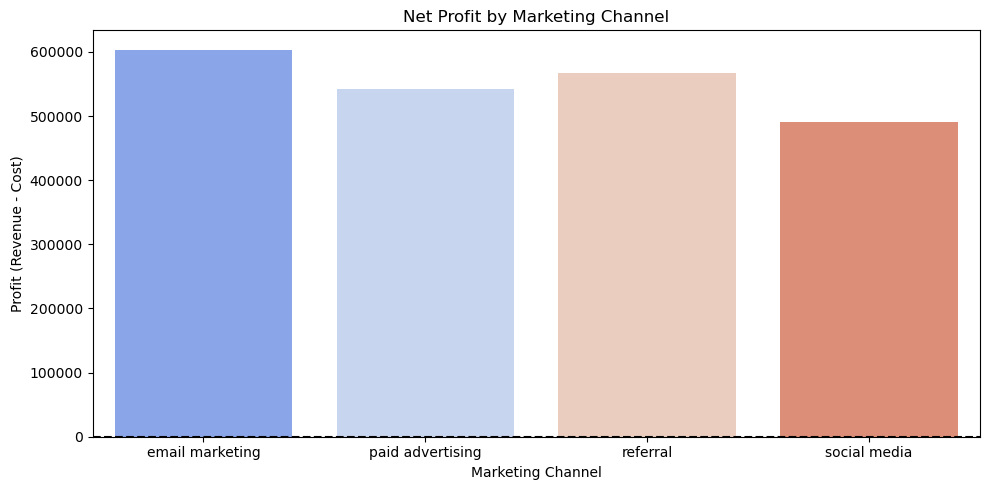

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=agg_df, x='channel', y='profit', palette='coolwarm')
plt.title('Net Profit by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Profit (Revenue - Cost)')
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


In [18]:
# Group by channel and calculate total cost and revenue
grouped = df.groupby('channel').agg(
    total_revenue=('revenue', 'sum'),
    total_cost=('cost', 'sum')
).reset_index()

# Calculate ROI
grouped['ROI (%)'] = ((grouped['total_revenue'] - grouped['total_cost']) / grouped['total_cost']) * 100

# Display the result
print("ROI by Channel:")
print(grouped)

ROI by Channel:
            channel  total_revenue   total_cost       ROI (%)
0   email marketing         604706  1122.700340  53761.745510
1  paid advertising         548396  5907.363479   9183.261508
2          referral         569552  1722.307634  32969.121271
3      social media         492667  1766.070249  27796.228953


In [19]:
# Group by channel
grouped = df.groupby('channel').agg(
    total_revenue=('revenue', 'sum'),
    total_cost=('cost', 'sum'),
    customer_count=('customer_id', 'nunique')  # Number of unique customers
).reset_index()

# Calculate ROI (%)
grouped['ROI (%)'] = ((grouped['total_revenue'] - grouped['total_cost']) / grouped['total_cost']) * 100

# Add context metrics
grouped['Revenue per Customer'] = grouped['total_revenue'] / grouped['customer_count']
grouped['Cost per Customer'] = grouped['total_cost'] / grouped['customer_count']

# Display table
print(grouped)

            channel  total_revenue   total_cost  customer_count       ROI (%)  \
0   email marketing         604706  1122.700340             214  53761.745510   
1  paid advertising         548396  5907.363479             194   9183.261508   
2          referral         569552  1722.307634             207  32969.121271   
3      social media         492667  1766.070249             185  27796.228953   

   Revenue per Customer  Cost per Customer  
0           2825.728972           5.246263  
1           2826.783505          30.450327  
2           2751.458937           8.320327  
3           2663.064865           9.546326  
